In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
from dataset import SNPmarkersDataset
import matplotlib.pyplot as plt

In [3]:
train_dataset = SNPmarkersDataset(mode="train")
validation_dataset = SNPmarkersDataset(mode="validation")
test_dataset = SNPmarkersDataset(mode="test")

# Phenotype statistics

In [10]:
train_phenotypes_df = pd.DataFrame.from_dict(train_dataset.phenotypes)
validation_phenotypes_df = pd.DataFrame.from_dict(validation_dataset.phenotypes)
test_phenotypes_df = pd.DataFrame.from_dict(test_dataset.phenotypes)


means = pd.DataFrame([np.mean(train_phenotypes_df, axis = 0), np.mean(validation_phenotypes_df, axis = 0), np.mean(test_phenotypes_df, axis = 0)], index = ["Train", "Validation", "Test"])
print("Means: ")
print(means)
print("\n\n")

print("/////////////////////////////////////////////////////////////////////////////////")
covariance_df = train_phenotypes_df.cov()
print("Covariance matrix for the training dataset: ")
print(covariance_df)
print("---------------------------------------------------------------------------------")

covariance_df = validation_phenotypes_df.cov()
print("Covariance matrix for the validation dataset: ")
print(covariance_df)
print("---------------------------------------------------------------------------------")

covariance_df = test_phenotypes_df.cov()
print("Covariance matrix for the test dataset: ")
print(covariance_df)
print("/////////////////////////////////////////////////////////////////////////////////")
print("\n\n")

correlation_df = train_phenotypes_df.corr()
print("Correlation matrix for the training dataset: ")
print(correlation_df)
print("---------------------------------------------------------------------------------")

correlation_df = validation_phenotypes_df.corr()
print("Correlation matrix for the validation dataset: ")
print(correlation_df)
print("---------------------------------------------------------------------------------")

correlation_df = test_phenotypes_df.corr()
print("Correlation matrix for the test dataset: ")
print(correlation_df)

Means: 
             pheno_1   pheno_2   pheno_3   pheno_4   pheno_5   pheno_6
Train       3.399447  5.106447  3.319052  3.253731 -3.633327  2.869897
Validation  3.482662  5.165595  3.262105  3.193079 -2.773054  2.950615
Test        3.789484  5.678984  3.550566  3.568580 -3.120654  3.050898



/////////////////////////////////////////////////////////////////////////////////
Covariance matrix for the training dataset: 
          pheno_1    pheno_2   pheno_3   pheno_4    pheno_5   pheno_6
pheno_1  4.120512   5.428860  2.036304  2.253311  -3.278040  2.806814
pheno_2  5.428860  14.758584  3.047348  3.662180  -7.095327  5.084772
pheno_3  2.036304   3.047348  2.634132  1.932408  -1.864185  2.154414
pheno_4  2.253311   3.662180  1.932408  2.517830  -2.162567  2.241811
pheno_5 -3.278040  -7.095327 -1.864185 -2.162567  59.005047 -2.920423
pheno_6  2.806814   5.084772  2.154414  2.241811  -2.920423  3.004021
---------------------------------------------------------------------------------
Covari

# Phenotype histogram visualisation

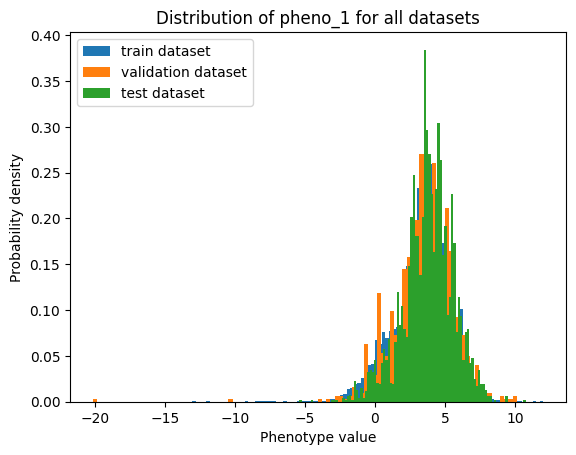

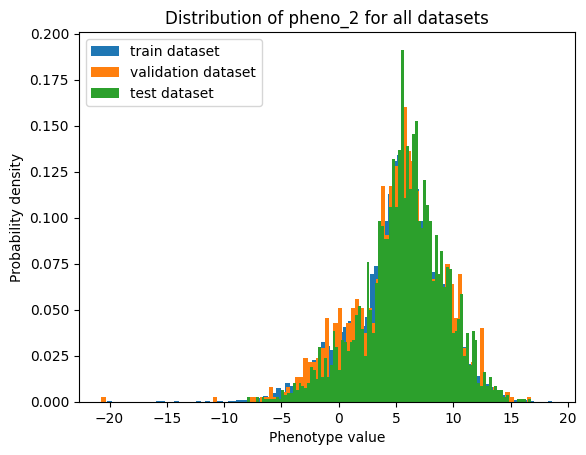

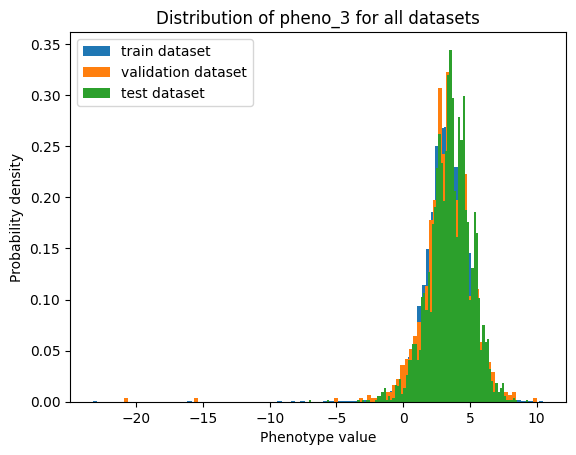

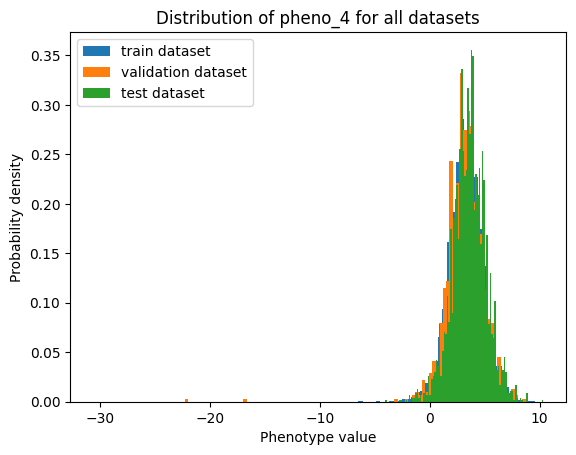

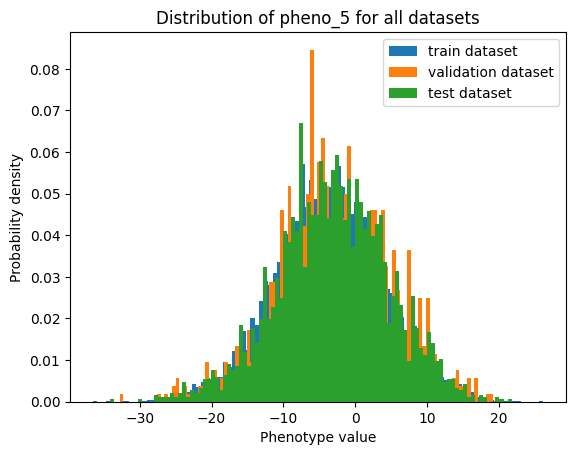

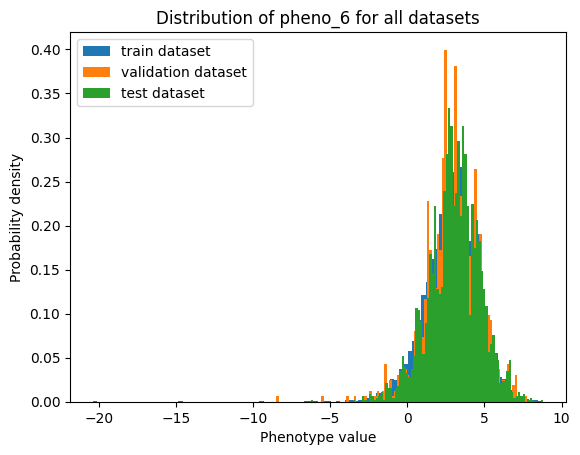

In [6]:
plt.hist(train_phenotypes_df["pheno_1"].dropna(), bins=100, density=True, label = "train dataset")
plt.hist(validation_phenotypes_df["pheno_1"].dropna(), bins=100, density=True, label = "validation dataset")
plt.hist(test_phenotypes_df["pheno_1"].dropna(), bins=100, density=True, label = "test dataset")
plt.legend()
plt.xlabel("Phenotype value")
plt.ylabel("Probability density")
plt.title("Distribution of pheno_1 for all datasets")
plt.show()

plt.hist(train_phenotypes_df["pheno_2"].dropna(), bins=100, density=True, label = "train dataset")
plt.hist(validation_phenotypes_df["pheno_2"].dropna(), bins=100, density=True, label = "validation dataset")
plt.hist(test_phenotypes_df["pheno_2"].dropna(), bins=100, density=True, label = "test dataset")
plt.legend()
plt.ylabel("Probability density")
plt.xlabel("Phenotype value")
plt.title("Distribution of pheno_2 for all datasets")
plt.show()

plt.hist(train_phenotypes_df["pheno_3"].dropna(), bins=100, density=True, label = "train dataset")
plt.hist(validation_phenotypes_df["pheno_3"].dropna(), bins=100, density=True, label = "validation dataset")
plt.hist(test_phenotypes_df["pheno_3"].dropna(), bins=100, density=True, label = "test dataset")
plt.legend()
plt.ylabel("Probability density")
plt.xlabel("Phenotype value")
plt.title("Distribution of pheno_3 for all datasets")
plt.show()

plt.hist(train_phenotypes_df["pheno_4"].dropna(), bins=100, density=True, label = "train dataset")
plt.hist(validation_phenotypes_df["pheno_4"].dropna(), bins=100, density=True, label = "validation dataset")
plt.hist(test_phenotypes_df["pheno_4"].dropna(), bins=100, density=True, label = "test dataset")
plt.legend()
plt.xlabel("Phenotype value")
plt.ylabel("Probability density")
plt.title("Distribution of pheno_4 for all datasets")
plt.show()

plt.hist(train_phenotypes_df["pheno_5"].dropna(), bins=100, density=True, label = "train dataset")
plt.hist(validation_phenotypes_df["pheno_5"].dropna(), bins=100, density=True, label = "validation dataset")
plt.hist(test_phenotypes_df["pheno_5"].dropna(), bins=100, density=True, label = "test dataset")
plt.legend()
plt.xlabel("Phenotype value")
plt.ylabel("Probability density")
plt.title("Distribution of pheno_5 for all datasets")
plt.show()

plt.hist(train_phenotypes_df["pheno_6"].dropna(), bins=100, density=True, label = "train dataset")
plt.hist(validation_phenotypes_df["pheno_6"].dropna(), bins=100, density=True, label = "validation dataset")
plt.hist(test_phenotypes_df["pheno_6"].dropna(), bins=100, density=True, label = "test dataset")
plt.legend()
plt.xlabel("Phenotype value")
plt.ylabel("Probability density")
plt.title("Distribution of pheno_6 for all datasets")
plt.show()